In [2]:
import numpy as np
import pandas as pd
import time

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

Đọc đường dẫn dữ liệu

In [3]:
path = '../../data/Perceptron/sonar.all-data.csv'

main_df = pd.read_csv(path, header=None)
main_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


Kiểm tra độ cân bằng của dữ liệu bằng biểu đồ nhóm theo cuối cùng

<Axes: ylabel='60'>

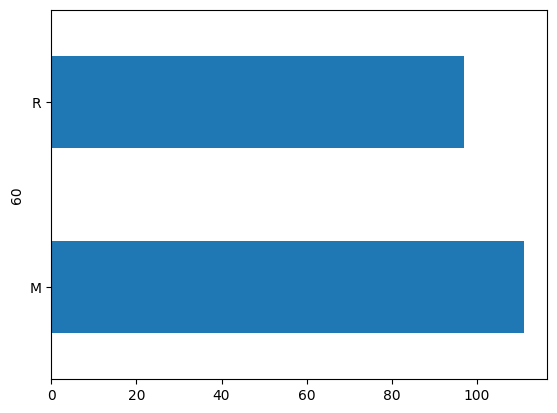

In [4]:
main_df[60].value_counts().plot(kind='barh')

Đổi nhãn đầu ra từ {'M', 'R'} sang {1, -1}

In [5]:
y_df = main_df[60]
target_label = {'M': 1, 'R': -1}
target_df = [target_label[item] for item in y_df]
print(target_df)

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [6]:
inputs_df = main_df.drop(60, axis=1)

x0 = np.ones((inputs_df.shape[0], 1))
X = np.concatenate((x0, inputs_df), axis=1)

Số chiều hiện tại là 61 (trường) và 208 (bản ghi). Chia dữ liệu ra thành tập train : test với tỷ lệ 7 : 3

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, target_df, test_size=0.3, random_state=42)

In [8]:
# Define h_w(x):= W^T.x + w_0 = \bar{W}^T . \bar{x}
def h(w, x):
    return np.sign(np.dot(w.T, x))

In [9]:
#Stop condition
def has_converged(X, y, w):
    return np.array_equal(h(w, X), y) #True if h(w, X) == y else False

In [10]:
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = [] # set of miss position points
    iter = 0
    eta = 0.05
    
    while iter < 10000:
        # mix data
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(X.shape[0], 1)
            yi = y[mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + eta*yi*xi
                w.append(w_new)
                
        if has_converged(X, y, w[-1]):
            break
        
        iter += 1
    return (w, mis_points)

In [11]:
def predict(w, x):
    return h(w, x)

Perceptron

In [12]:
d = X.T.shape[0]
w_init = np.random.randn(d, 1)

start_time = time.time()

(w, m) = perceptron(X_train.T, y_train, w_init)
y_pred = predict(w[-1], X_test.T)

end_time = time.time()

print('Run time:', end_time - start_time)
print('Accuracy:', accuracy_score(y_test, y_pred[0]))
print('Recall:', recall_score(y_test, y_pred[0]))
print('Precision:', precision_score(y_test, y_pred[0]))

Run time: 24.197481632232666
Accuracy: 0.7777777777777778
Recall: 0.8285714285714286
Precision: 0.7837837837837838


Logistic Regression

In [13]:
logR = LogisticRegression()


start_time = time.time()

logR.fit(X_train, y_train)
y_pred_logR = logR.predict(X_test)

end_time = time.time()

print('Run time:', end_time - start_time)
print('Accuracy:', accuracy_score(y_test, y_pred_logR))
print('Recall:', recall_score(y_test, y_pred_logR))
print('Precision:', precision_score(y_test, y_pred_logR))

Run time: 0.0166471004486084
Accuracy: 0.8095238095238095
Recall: 0.8571428571428571
Precision: 0.8108108108108109


Naive Bayes

In [14]:
nb = GaussianNB()

start_time = time.time()

nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

end_time = time.time()

print('Run time:', end_time - start_time)
print('Accuracy:', accuracy_score(y_test, y_pred_nb))
print('Recall:', recall_score(y_test, y_pred_nb))
print('Precision:', precision_score(y_test, y_pred_nb))

Run time: 0.00353240966796875
Accuracy: 0.7777777777777778
Recall: 0.6571428571428571
Precision: 0.92


**Đánh giá:**

* `Thời gian chạy` của Perceptron lâu hơn nhiều lần so với 2 phương pháp còn lại.

* `Accuracy` của Logistic Regression là cao nhất còn Perceptron và Naive Bayes thì tương đương nhau.

* `Recall` của Naive Bayes là thấp nhất còn của 2 phương pháp còn lại khá cao, hơn 80%.

* `Precision` của Naive Bayes là cao nhất tiếp đến là Logistic RegressionRegression và cuối cùng là Perceptron.